In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit as s, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7853-GVUDZ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,20.15,Yes
1,6893-ODYYE,Male,0,No,No,50,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,4549.45,No
2,0486-HECZI,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.9,Yes
3,8972-HJWNV,Female,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.55,646.85,Yes
4,9317-WZPGV,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.75,159.4,Yes


In [8]:
df.nunique()

customerID          6000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1519
TotalCharges        5622
Churn                  2
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


In [3]:
#since total charges is an object variable we will transform it to numeric
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric,errors='coerce')

In [6]:
df.Churn.value_counts()

0    4417
1    1583
Name: Churn, dtype: int64

In [4]:
#changing categorical values of our target variable to numerical
df.Churn = df.Churn.replace({'Yes':1,'No':0})

In [5]:
#we can drop customerID variable since it does not provide any value
df.drop('customerID',axis=1,inplace=True)

Exploratory data analysis

In [38]:
df_obj = df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
df_num = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

In [58]:
df.PaymentMethod.value_counts()

Electronic check             2022
Mailed check                 1355
Credit card (automatic)      1315
Bank transfer (automatic)    1308
Name: PaymentMethod, dtype: int64

In [60]:
df.groupby('tenure').mean()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
tenure,,,,
0,0.000000,43.025000,NaN,0.000000
1,0.143969,49.656712,49.656712,0.622568
2,0.183168,56.861634,113.770545,0.519802
3,0.141176,57.830294,174.170294,0.482353
4,0.156863,57.417320,231.052614,0.477124
...,...,...,...,...
68,0.139535,73.457558,5017.537209,0.104651
69,0.141026,70.517308,4860.009615,0.089744
70,0.147059,75.889706,5312.600980,0.088235


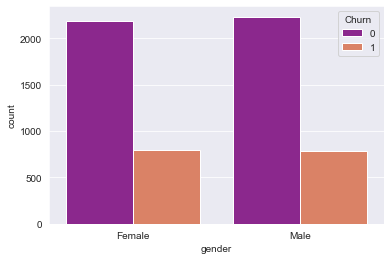

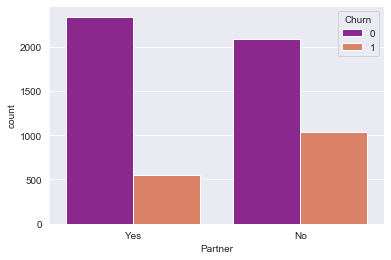

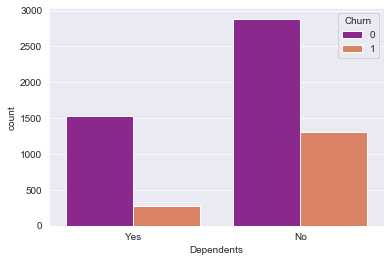

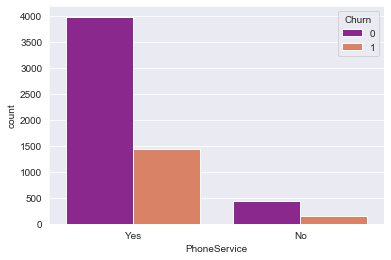

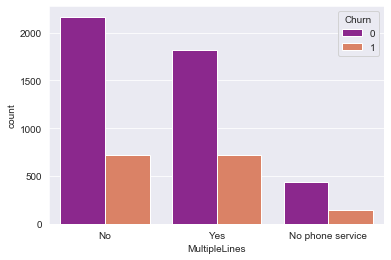

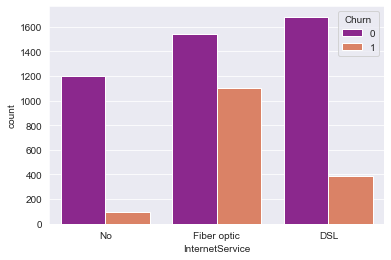

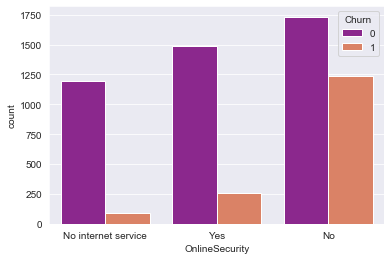

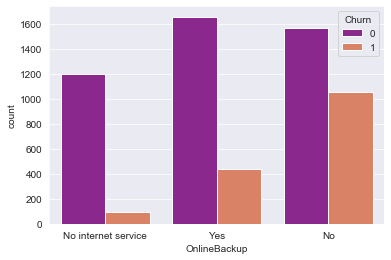

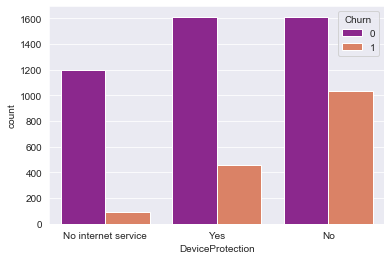

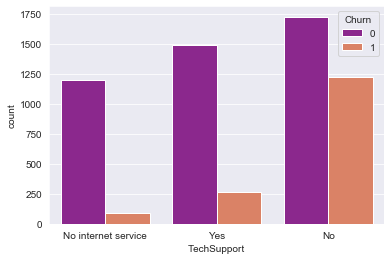

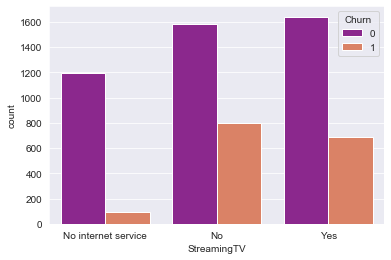

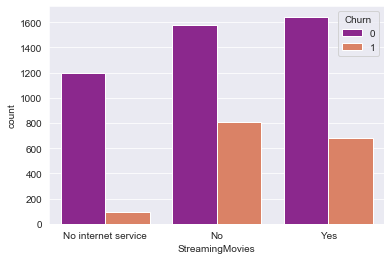

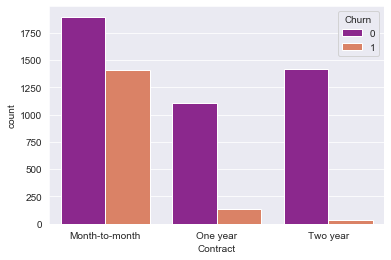

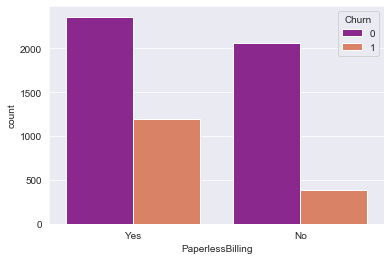

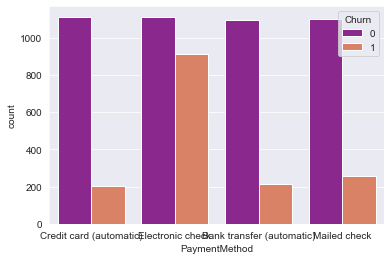

In [39]:
for i in list(df_obj.columns):
    sns.countplot(x=i,hue='Churn',data=df,palette='plasma')
    plt.show()

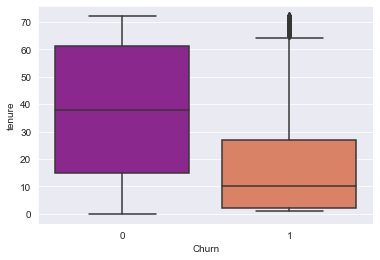

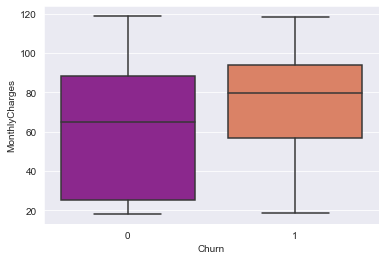

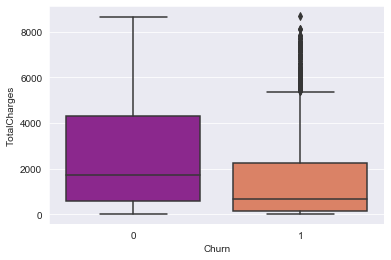

In [59]:
for i in list(df_num.columns[1:]):
    sns.boxplot(y=i,x = 'Churn', data = df,palette ='plasma')
    plt.show()

1. **'Gender'**: Gender does not affect the customer churn rate
2. **'Partner'**: Among those who does not have partner the churn percentage is higher than among those who has a partner (maybe it's due to higher income of 2 people)
3. **'Dependents'**: Churn rate among people without dependents is higher and there are more clients without dependents
4. **'PhoneService','MultipleLines'**: There are more customers which use PhoneService, but this variable does not affect churn rate. However among clients who use multile line, the churn rate is higher.
5. **'InternetService'**: customers which use Fiber Optic prevail among other clients both in quanity and in churn rate
6. **'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'**: customers which don't use (have) mentioned variables have higher churn rate (since their service is worse or they don't want to / can't spend money on them)
7. **'StreamingTV','StreamingMovies'**: customers which don't have mentioned variables have higher churn rate, however the difference (effect of service usage) is very small
8. **'Contract'**: more than a half of customers use month-to-month contract type and more than 40% of those clients churnm while customers with one and two year contract types have less than 10% churn rate
9. **'PaperlessBilling'**: those customers who use paperlessbilling tend to churn more than those who doesn't                              10.**'PaymentMethod'**: the majority of customers use Electronic check payment method and they have highest (45%) churn rate. 11.**'Tenure'**: the higher the tanure the less is the churn rate, most probably because those people have higher income 12.**'MonthlyCharges'**: people who pay higher monthly charges tend to have higher churn rate (as mentioned above, customers who choose month-to-month payment method have higher churn rate, since they are short-term)                                                     13.**'TotalCharges'**: people with higher total charges have lower churn rate (most probably due to long-term usage of the service - plan). However, we can also notice that the variable has outliers.

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,6000.000000,6000.000000,6000.000000,5990.000000,6000.000000
mean,0.164167,32.474500,64.926142,2294.446227,0.263833
std,0.370458,24.580963,30.043373,2265.163596,0.440747
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.800000,411.225000,0.000000
50%,0.000000,29.000000,70.525000,1413.600000,0.000000
75%,0.000000,56.000000,89.800000,3825.437500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


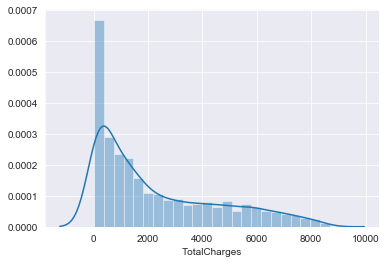

In [64]:
sns.distplot(df.TotalCharges)

In [70]:
df.sort_values(by=['TotalCharges'],ascending=False)['TotalCharges'].head(50)

4917    8684.80
5799    8672.45
4414    8670.10
4306    8594.40
4014    8564.75
1618    8547.15
5019    8543.25
2809    8496.70
4385    8477.70
3418    8477.60
2203    8476.50
1057    8468.20
1600    8456.75
3125    8443.70
1898    8425.15
98      8424.90
2171    8405.00
5866    8404.90
5543    8399.15
416     8375.05
3593    8349.70
4010    8349.45
5358    8337.45
1332    8333.95
5646    8332.15
4031    8331.95
3818    8312.75
2143    8312.40
5474    8310.55
3644    8309.55
683     8308.90
5702    8306.05
4932    8297.50
1587    8289.20
2411    8277.05
2344    8250.00
204     8248.50
5838    8244.30
4625    8220.40
4568    8196.40
5941    8182.85
5480    8182.75
4402    8166.80
5392    8165.10
1516    8164.10
164     8152.30
2249    8129.30
4735    8127.60
1566    8126.65
307     8109.80
Name: TotalCharges, dtype: float64

since there are many clients with value of TotalCharges above 8000 we will not remove it.

In [74]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.018463,0.219150,0.104669,0.147140
tenure,0.018463,1.000000,0.246641,0.826919,-0.362533
MonthlyCharges,0.219150,0.246641,1.000000,0.648697,0.188892
TotalCharges,0.104669,0.826919,0.648697,1.000000,-0.211801
Churn,0.147140,-0.362533,0.188892,-0.211801,1.000000


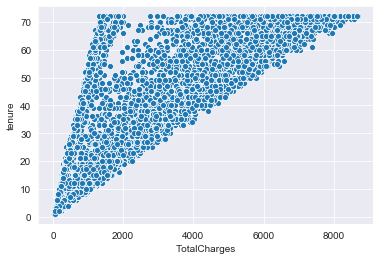

In [75]:
bsns.scatterplot(df.TotalCharges,df.tenure)

as we can see tenure and total_charges strongly correlate with each other and we can assume that: the higher the tenure of the client -> the higher is the income -> more services are used in a long-term -> higher total_charges -> less is the churn rate

Now we will split our dataset on test and train sets, preprocess variables and compare performance of 5 classification algorithms.

In [6]:
#our dataset is not balanced, thus I decided to try using stratified shuffled split

s_split = s(n_splits=1,test_size=0.2,random_state=42)

#splitting criteria: Churn variable
for train_index, test_index in s_split.split(df,df.Churn):
    s_train_set = df.loc[train_index]
    s_test_set = df.loc[test_index]
    
X_train = s_train_set.drop('Churn',axis=1)
y_train = s_train_set['Churn']
X_test = s_test_set.drop('Churn',axis=1)
y_test = s_test_set['Churn']

In [7]:
#Preprocessing
cat_attribs = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
num_attribs = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler()),])

full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs), ('cat',OneHotEncoder(),cat_attribs)])

In [8]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

# Build 5 classification models

In [9]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(svm.SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())

In [10]:
#from sklearn.model_selection import cross_validate

for classifier in clfs:
    pipeline = Pipeline([('clf',classifier)]) #.set_params(clf = classifier)
    #pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())
    fit = pipeline.fit(X_train,y_train)
    y_pred_train = fit.predict(X_train)
    y_pred_test = fit.predict(X_test)
    print('Test_accuracy:',accuracy_score(y_test,y_pred_test))
    print('Train_accuracy:',accuracy_score(y_train,y_pred_train))
    print('precision_score:',precision_score(y_test,y_pred_test))
    print('recall score:',recall_score(y_test,y_pred_test)) 

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
fit_time  mean  0.3429745674133301
fit_time  std  0.2384374203566002
score_time  mean  0.0034069538116455076
score_time  std  0.002518332753227144
test_score  mean  0.8125
test_score  std  0.009991315673568172
Test_accuracy: 0.7941666666666667
Train_accuracy: 0.8129166666666666
precision_score: 0.6346153846153846
recall score: 0.5205047318611987
---------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
  

From the above we can assume that LogisticRegression and RandomForestClassifier are the best model for our dataset.
So we will try to tune the hyperparameters and choose the best ones.

#### choose the best model. Either retrain it or copy it in the cell below

In [11]:
clf = LogisticRegression()
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0]
penalty = ['l1', 'l2']
param_grid = dict(C=c_values, penalty=penalty)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_result = grid.fit(X_train, y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.813125 using {'C': 0.7, 'penalty': 'l2'}


In [12]:
clf = LogisticRegression(C=0.7,penalty='l2')
clf.fit(X_train,y_train,)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Test_accuracy:',accuracy_score(y_test,y_pred))
print('Train_accuracy:',accuracy_score(y_train,y_train_pred))
print('Confusion matrix and classification report for test set:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test_accuracy: 0.7933333333333333
Train_accuracy: 0.813125
Confusion matrix and classification report for test set:
[[788  95]
 [153 164]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       883
           1       0.63      0.52      0.57       317

    accuracy                           0.79      1200
   macro avg       0.74      0.70      0.72      1200
weighted avg       0.78      0.79      0.79      1200



In [13]:
clf2 = RandomForestClassifier()
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
grid = GridSearchCV(estimator=clf2, param_grid=param_grid, scoring='accuracy', cv=5)
grid_result = grid.fit(X_train, y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.789375 using {'max_features': 4, 'n_estimators': 30}


In [14]:
clf = RandomForestClassifier(max_features = 4, n_estimators = 30)
clf.fit(X_train,y_train,)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Test_accuracy:',accuracy_score(y_test,y_pred))
print('Train_accuracy:',accuracy_score(y_train,y_train_pred))
print('Confusion matrix and classification report for test set:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test_accuracy: 0.7866666666666666
Train_accuracy: 0.995
Confusion matrix and classification report for test set:
[[802  81]
 [175 142]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       883
           1       0.64      0.45      0.53       317

    accuracy                           0.79      1200
   macro avg       0.73      0.68      0.69      1200
weighted avg       0.77      0.79      0.77      1200



**In general I would choose LogisticRegression for this task.**

I tried to put the scores in dataframe, however there is an error **'TypeError: 'numpy.float64' object is not callable'** for precision_score metric, which I couldn't solve.

In [ ]:
for classifier in clfs:
    pipeline = Pipeline([('clf',classifier)])
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())
    
    fit = pipeline.fit(X_train,y_train)
    y_pred_train = fit.predict(X_train)
    y_pred_test = fit.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    p = precision_score(y_test,y_pred_test)
    r = recall_score(y_test,y_pred_test) 
    scores = pd.DataFrame({'classifier':classifier,'test_accuracy':test_accuracy,'train_accuracy':train_accuracy,'precision_score':p,'recall_score':r},index=[1,2,3,4,5])